        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                    

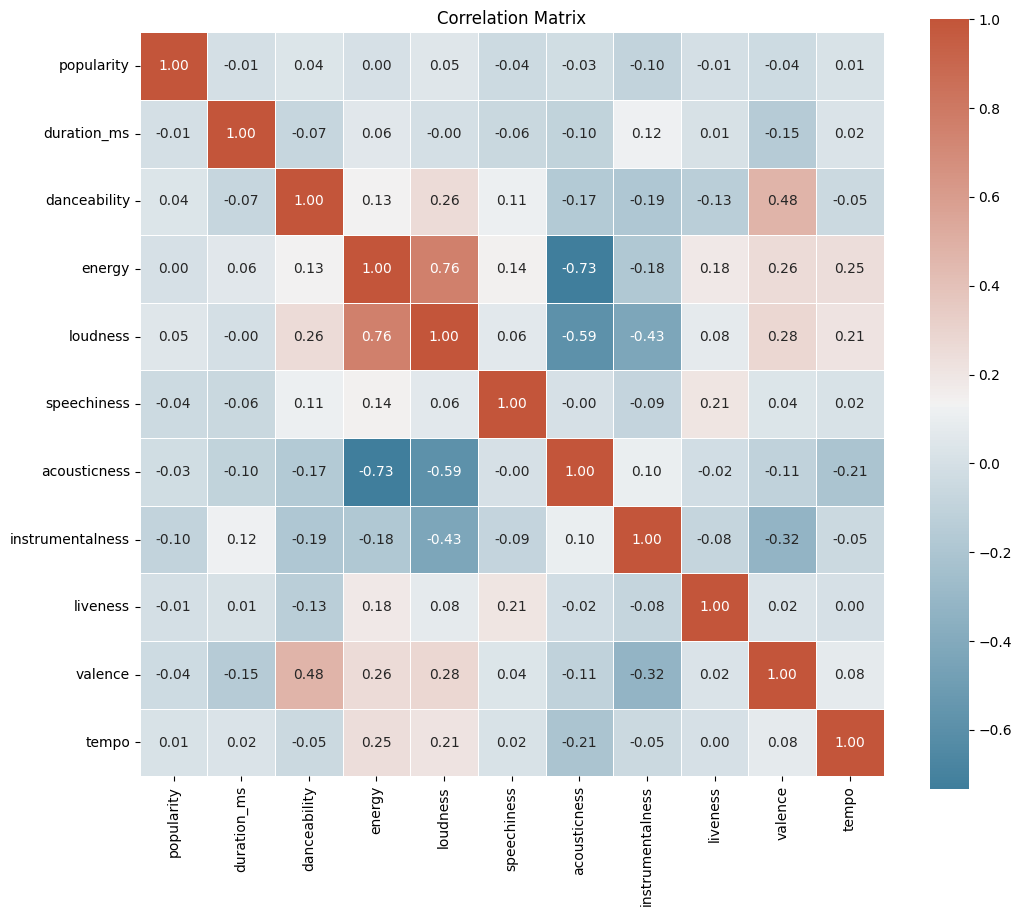

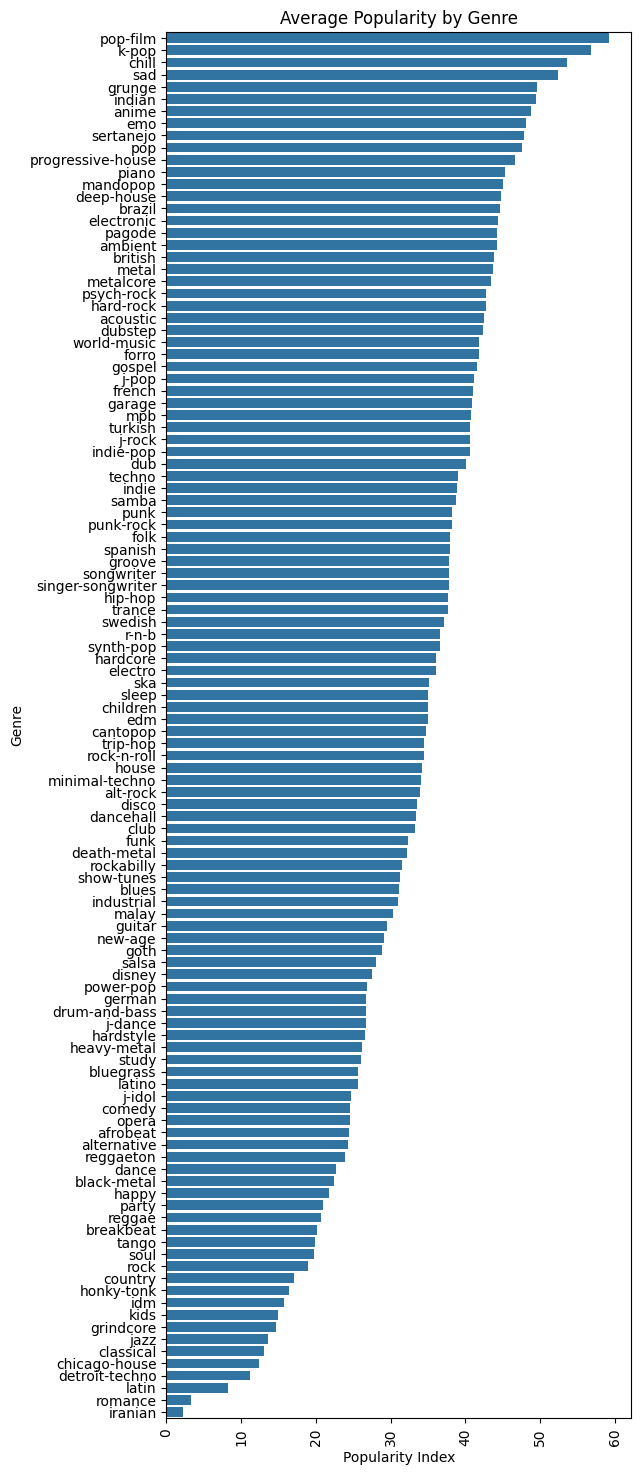

In [16]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the csv file into a pandas DataFrame
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

# Remove the leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the table
print(df)

# Seperate and section off the data by putting it in a nested dataframe
numeric_cols = [
    "popularity",
    "duration_ms",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo"]
numeric_df = df[numeric_cols]
# Create a figure to visualise the correlation between the numerical and catagorical features of the dataset
plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix")
correlation = numeric_df.corr()
# Create a colour/heat map
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask we computed
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, square = True)

# Display the final figure
plt.show()

# Next we're going to further deconstruct the data in order to understand it better

# First we'll find the average for each genre in the dataset
mean_df = df.groupby('track_genre')[numeric_cols].mean()

# Sort the DataFrame by the mean value of the variable
mean_df = mean_df.sort_values(by='popularity', ascending=False)

# Create the plot
plt.figure(figsize=(6, 18))
sns.barplot(x='popularity', y=mean_df.index, data=mean_df)
plt.xticks(rotation=90)

# Title and axis of the plot
plt.title('Average Popularity by Genre')
plt.xlabel('Popularity Index')
plt.ylabel('Genre')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


# Keep only the top 10 most common genres to simplify classification
top_genres = df['track_genre'].value_counts().index[:10]
df = df[df['track_genre'].isin(top_genres)]

# Encode genre labels numerically
le = LabelEncoder()
df['genre_label'] = le.fit_transform(df['track_genre'])

# Normalize numeric features
X = df[numeric_cols].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Labels
y = df['genre_label'].values

# Train-test split (stratified ensures equal genre distribution in both)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)


# Show shape to confirm
print("Train shape:", X_train_tensor.shape)
print("Test shape:", X_test_tensor.shape)


Using device: cuda
Train shape: torch.Size([8000, 11])
Test shape: torch.Size([2000, 11])


<ipython-input-17-c9cd730fc2de>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_label'] = le.fit_transform(df['track_genre'])


Epoch [1/60], Loss: 2.3275
Epoch [2/60], Loss: 2.2430
Epoch [3/60], Loss: 2.1660
Epoch [4/60], Loss: 2.0953
Epoch [5/60], Loss: 2.0292
Epoch [6/60], Loss: 1.9611
Epoch [7/60], Loss: 1.9061
Epoch [8/60], Loss: 1.8478
Epoch [9/60], Loss: 1.7953
Epoch [10/60], Loss: 1.7429
Epoch [11/60], Loss: 1.6986
Epoch [12/60], Loss: 1.6541
Epoch [13/60], Loss: 1.6225
Epoch [14/60], Loss: 1.5938
Epoch [15/60], Loss: 1.5708
Epoch [16/60], Loss: 1.5518
Epoch [17/60], Loss: 1.5337
Epoch [18/60], Loss: 1.5167
Epoch [19/60], Loss: 1.5079
Epoch [20/60], Loss: 1.4949
Epoch [21/60], Loss: 1.4858
Epoch [22/60], Loss: 1.4663
Epoch [23/60], Loss: 1.4644
Epoch [24/60], Loss: 1.4518
Epoch [25/60], Loss: 1.4502
Epoch [26/60], Loss: 1.4330
Epoch [27/60], Loss: 1.4278
Epoch [28/60], Loss: 1.4196
Epoch [29/60], Loss: 1.4092
Epoch [30/60], Loss: 1.4085
Epoch [31/60], Loss: 1.3882
Epoch [32/60], Loss: 1.3815
Epoch [33/60], Loss: 1.3828
Epoch [34/60], Loss: 1.3707
Epoch [35/60], Loss: 1.3545
Epoch [36/60], Loss: 1.3421
E

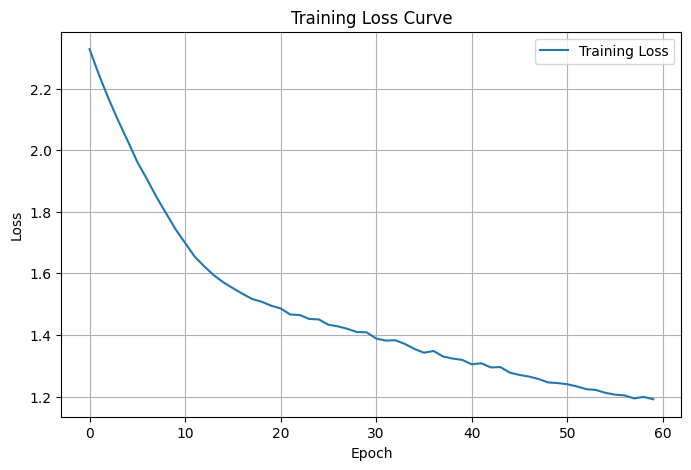

In [18]:
import torch.nn as nn
import torch.optim as optim

class HarmoniaNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(HarmoniaNet, self).__init__()
        self.network = nn.Sequential(
          nn.Linear(input_size, 256),
          nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(256, 512),
          nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(512, num_classes)
      )

    def forward(self, x):
        return self.network(x)

# Instantiate model
input_size = X_train_tensor.shape[1]
num_classes = len(le.classes_)
model = HarmoniaNet(input_size, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Track losses for plotting
train_losses = []

# Training loop
epochs = 60
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # <- store loss per epoch

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()




In [19]:
# Evaluation on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.argmax(test_outputs, axis=1)
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.6010


Classification Report:

              precision    recall  f1-score   support

    acoustic       0.51      0.47      0.49       200
    afrobeat       0.67      0.67      0.67       200
    alt-rock       0.36      0.32      0.33       200
 alternative       0.42      0.47      0.44       200
     ambient       0.80      0.78      0.79       200
       anime       0.54      0.53      0.54       200
 black-metal       0.84      0.91      0.87       200
   bluegrass       0.66      0.81      0.73       200
       blues       0.54      0.39      0.45       200
      brazil       0.61      0.68      0.64       200

    accuracy                           0.60      2000
   macro avg       0.59      0.60      0.60      2000
weighted avg       0.59      0.60      0.60      2000



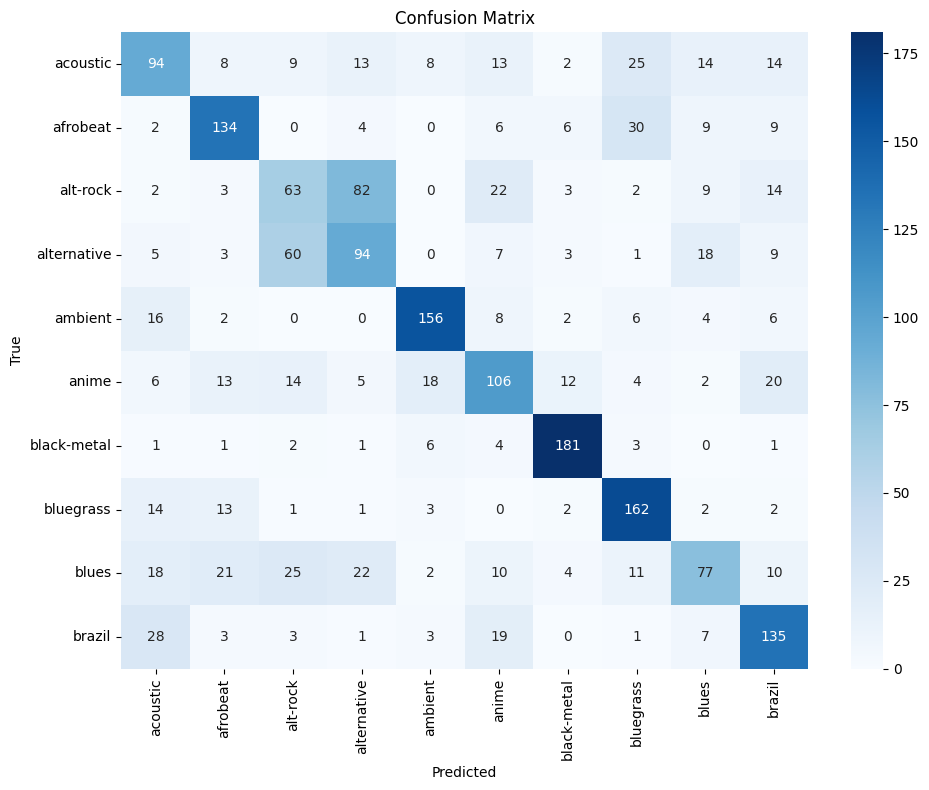

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Move predictions and true labels back to CPU and NumPy
y_true = y_test_tensor.cpu().numpy()
y_pred = predictions.cpu().numpy()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
